In [1]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import pulp
# Assuming df is your DataFrame containing the data
# Grouping by State and District columns and calculating mean of Objective Nitrogen and Objective Water

rabi_p= pd.read_csv(r"E:\crop_switchning\fig2\code_final_cop\kharif_data\rabi_perito_saving_rice_culture_new_nested_result_alpha_value_no_gamma.csv")
kharif_p=pd.read_csv(r"E:\crop_switchning\fig2\code_final_cop\kharif_data\kharif_perito_saving_rice_culture_new_nested_result_alpha_value_no_gamma.csv")

In [2]:
import pandas as pd

# Assuming rabi_p and kharif_p are already loaded from the CSV files
# Concatenate rabi_p and kharif_p DataFrames
combined_df = pd.concat([rabi_p, kharif_p])

# Group by 'Alpha' and calculate sum for 'Objective Nitrogen' and 'Objective Water'
combined_sums = combined_df.groupby('Alpha')[['Objective Nitrogen', 'Objective Water']].mean().reset_index()



In [3]:
combined_sums

,Alpha,Objective Nitrogen,Objective Water
0,0.00,2.853118e+09,1.159904e+11
1,0.01,2.853118e+09,1.159904e+11
2,0.02,2.853118e+09,1.159904e+11
3,0.03,2.853118e+09,1.159904e+11
4,0.04,2.853118e+09,1.159904e+11
...,...,...,...
96,0.96,2.681963e+09,1.172748e+11
97,0.97,2.651014e+09,1.181323e+11
98,0.98,2.600722e+09,1.201634e+11
99,0.99,2.572670e+09,1.221513e+11


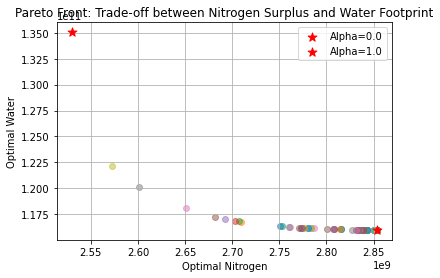

In [4]:
alpha_values = [i/100 for i in range(0, 101)]  # Start from 80 to get 0.8, end at 100 to include 1.0
# Plotting
# Plotting
for alpha in alpha_values:
    filtered_results = combined_sums[combined_sums['Alpha'] == alpha]
    if alpha in [0, 1]:
        plt.scatter(filtered_results['Objective Nitrogen'], filtered_results['Objective Water'], label=f'Alpha={alpha}', marker='*', zorder=2, color='Red', s=85)

    else:
        plt.scatter(filtered_results['Objective Nitrogen'], filtered_results['Objective Water'], marker='o', alpha=0.5, zorder=1)

plt.xlabel('Optimal Nitrogen')
plt.ylabel('Optimal Water')
plt.title('Pareto Front: Trade-off between Nitrogen Surplus and Water Footprint')
plt.legend()
plt.grid(True)
plt.show()


C:\Users\shekh\AppData\Local\Temp\ipykernel_30744\2537552512.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_results['Objective Nitrogen'] /= 1e9
C:\Users\shekh\AppData\Local\Temp\ipykernel_30744\2537552512.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_results['Objective Water'] /= 1e9


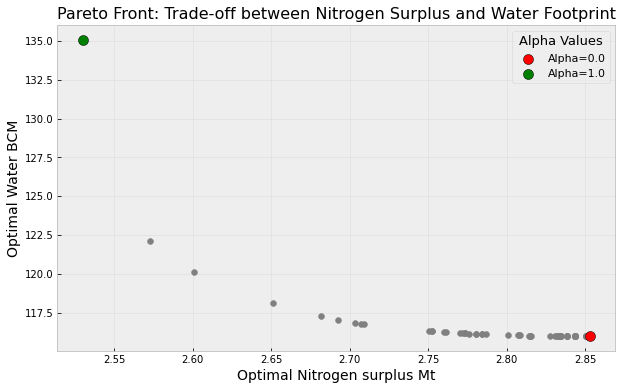

In [5]:
import matplotlib.pyplot as plt

# Use a style for the plot to make it more aesthetically pleasing
# Use a style for the plot to make it more aesthetically pleasing
plt.style.use('bmh')
# Define the figure and axis
fig, ax = plt.subplots(figsize=(10, 6))  # Adjust the size as needed


# Assuming 'combined_sums' DataFrame is already defined and contains the summed data for rabi_p and kharif_p

# Define alpha_values
alpha_values = [i/100 for i in range(0, 101)]  # Generates a list of alpha values from 0.00 to 1.00

# Plotting
for alpha in alpha_values:
    filtered_results = combined_sums[combined_sums['Alpha'] == alpha]
     # Divide the axis values by 1e6 to convert to million units
    filtered_results['Objective Nitrogen'] /= 1e9
    filtered_results['Objective Water'] /= 1e9
    # Choose color based on the Alpha value
    color = 'green' if alpha == 1 else 'red' if alpha == 0 else 'grey'
    edgecolor = 'black' if alpha in [0, 1] else None
    zorder = 3 if alpha in [0, 1] else 2
    label = f'Alpha={alpha}' if alpha in [0, 1] else None  # Label only for alpha 0 and 1
    size = 100 if alpha in [0, 1] else 35  # Larger size for alpha 0 and 1
    
    ax.scatter(filtered_results['Objective Nitrogen'], filtered_results['Objective Water'], 
               color=color, edgecolors=edgecolor, zorder=zorder, s=size, label=label)

# Improve the legend by specifying title
ax.legend(title="Alpha Values", title_fontsize='13', fontsize='11')

# Labeling and Titling
ax.set_xlabel('Optimal Nitrogen surplus Mt', fontsize=14)
ax.set_ylabel('Optimal Water BCM', fontsize=14)
ax.set_title('Pareto Front: Trade-off between Nitrogen Surplus and Water Footprint', fontsize=16)

# Improve the grid
ax.grid(True, linestyle='-', color='lightgrey', alpha=0.7)

# Show the plot
plt.show()


C:\Users\shekh\AppData\Local\Temp\ipykernel_30744\1877061799.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_results['Objective Nitrogen'] /= 1e9
C:\Users\shekh\AppData\Local\Temp\ipykernel_30744\1877061799.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_results['Objective Water'] /= 1e9


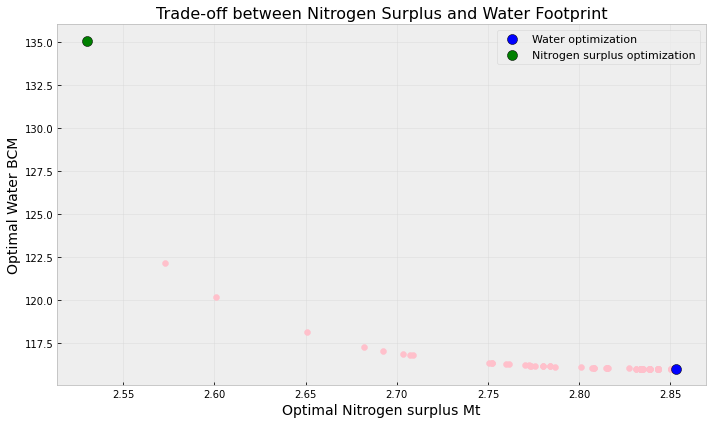

In [6]:
import matplotlib.pyplot as plt

plt.style.use('bmh')

fig, ax = plt.subplots(figsize=(10, 6))

# Assuming 'combined_sums' DataFrame is already defined and contains the summed data for rabi_p and kharif_p

alpha_values = [i/100 for i in range(0, 101)]  # Generates a list of alpha values from 0.00 to 1.00

for alpha in alpha_values:
    filtered_results = combined_sums[combined_sums['Alpha'] == alpha]
    # Divide the axis values by 1e9 to convert to billion units
    filtered_results['Objective Nitrogen'] /= 1e9
    filtered_results['Objective Water'] /= 1e9
    # Choose color based on the Alpha value
    color = 'green' if alpha == 1 else 'blue' if alpha == 0 else 'pink'
    edgecolor = 'black' if alpha in [0, 1] else None
    zorder = 3 if alpha in [0, 1] else 2
    # Adjust label assignment based on the alpha value
    if alpha == 1:
        label = 'Nitrogen surplus optimization'  # Label for alpha = 1
    elif alpha == 0:
        label = 'Water optimization'  # Label for alpha = 0
    else:
        label = None  # No label for other values
    size = 100 if alpha in [0, 1] else 35  # Larger size for alpha 0 and 1
    
    ax.scatter(filtered_results['Objective Nitrogen'], filtered_results['Objective Water'], 
               color=color, edgecolors=edgecolor, zorder=zorder, s=size, label=label)

# Improve the legend by specifying title
ax.legend( title_fontsize='13', fontsize='11')

# Labeling and Titling
ax.set_xlabel('Optimal Nitrogen surplus Mt', fontsize=14)
ax.set_ylabel('Optimal Water BCM', fontsize=14)
ax.set_title('Trade-off between Nitrogen Surplus and Water Footprint', fontsize=16)

# Improve the grid
ax.grid(True, linestyle='-', color='lightgrey', alpha=0.7)

plt.tight_layout()
#plt.savefig(r'E:\crop_switchning\fig2\code_final_cop\plot\perito_curve_combined.png', dpi=600)  # Save the figure as a PNG file with 300 dpi resolution
plt.show()

C:\Users\shekh\AppData\Local\Temp\ipykernel_30744\1224972599.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_results['Objective Nitrogen'] /= 1e9
C:\Users\shekh\AppData\Local\Temp\ipykernel_30744\1224972599.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_results['Objective Water'] /= 1e9


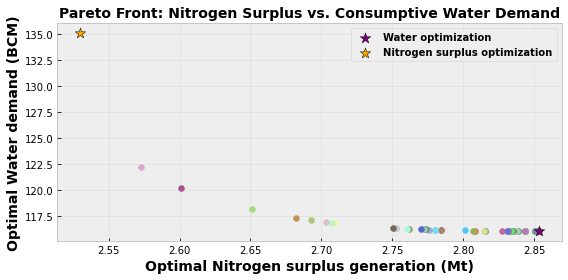

In [10]:
import matplotlib.pyplot as plt
import numpy as np

plt.style.use('bmh')

fig, ax = plt.subplots(figsize=(8, 4))

# Assuming 'combined_sums' DataFrame is already defined and contains the summed data for rabi_p and kharif_p

alpha_values = [i/100 for i in range(0, 101)]  # Generates a list of alpha values from 0.00 to 1.00

for alpha in alpha_values:
    filtered_results = combined_sums[combined_sums['Alpha'] == alpha]
    # Divide the axis values by 1e9 to convert to billion units
    filtered_results['Objective Nitrogen'] /= 1e9
    filtered_results['Objective Water'] /= 1e9
    # Choose color based on the Alpha value
    color = 'orange' if alpha == 1 else 'purple' if alpha == 0 else np.random.rand(3,) * 0.7 + 0.3   # Random color for other values
    edgecolor = 'black' if alpha in [0, 1] else None
    zorder = 3 if alpha in [0, 1] else 2
    # Adjust label assignment based on the alpha value
    if alpha == 1:
        label = 'Nitrogen surplus optimization'  # Label for alpha = 1
    elif alpha == 0:
        label = 'Water optimization'  # Label for alpha = 0
    else:
        label = None  # No label for other values
    size = 120 if alpha in [0, 1] else 35  # Larger size for alpha 0 and 1
    marker = '*' if alpha in [0, 1] else 'o'  # Use '*' marker for alpha 0 and 1, otherwise use 'o'
    
    ax.scatter(filtered_results['Objective Nitrogen'], filtered_results['Objective Water'], 
               color=color, edgecolors=edgecolor, zorder=zorder, s=size, label=label, marker=marker)

# Improve the legend by specifying title
ax.legend(title_fontsize='18', fontsize='28',loc='upper right', prop={'weight':'bold'})

# Labeling and Titling
ax.set_xlabel('Optimal Nitrogen surplus generation (Mt)', fontsize=14, color='black', fontweight='bold')
ax.set_ylabel('Optimal Water demand (BCM)', fontsize=14, color='black', fontweight='bold')
ax.set_title('Pareto Front: Nitrogen Surplus vs. Consumptive Water Demand', fontsize=14, fontweight='bold')
# After your plotting code

# Improve the grid
ax.grid(True, linestyle='-', color='lightgrey', alpha=0.7)

plt.tight_layout()
plt.savefig(r'E:\crop_switchning\fig2\code_final_cop\plot\perito_curve_combined.png', dpi=600)  # Save the figure as a PNG file with 300 dpi resolution
plt.show()


C:\Users\shekh\AppData\Local\Temp\ipykernel_30744\3787145305.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_results['Objective Nitrogen'] /= 1e9
C:\Users\shekh\AppData\Local\Temp\ipykernel_30744\3787145305.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_results['Objective Water'] /= 1e9


ValueError: 'color' kwarg must be a color or sequence of color specs.  For a sequence of values to be color-mapped, use the 'c' argument instead.

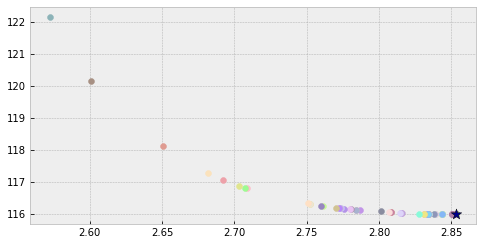

In [8]:
import matplotlib.pyplot as plt
import numpy as np

plt.style.use('bmh')  # Ensure the 'bmh' style is used for the plot

fig, ax = plt.subplots(figsize=(8, 4))

# Assuming 'combined_sums' DataFrame is already defined and contains the summed data for rabi_p and kharif_p

alpha_values = [i/100 for i in range(0, 101)]  # Generates a list of alpha values from 0.00 to 1.00

for alpha in alpha_values:
    filtered_results = combined_sums[combined_sums['Alpha'] == alpha]
    # Divide the axis values by 1e9 to convert to billion units
    filtered_results['Objective Nitrogen'] /= 1e9
    filtered_results['Objective Water'] /= 1e9
    # Choose color based on the Alpha value
    if alpha == 1:
        color = 'darkyellow'  # Dark yellow for alpha = 1
    elif alpha == 0:
        color = 'darkblue'  # Dark blue for alpha = 0
    else:
        # Generate a random light color
        # Mix the random color with white to lighten it
        base_color = np.random.rand(3,)
        light_color = 0.5 * base_color + 0.5 * np.array([1, 1, 1])  # Mixing with white to lighten the color
        color = light_color
    edgecolor = 'black' if alpha in [0, 1] else None
    zorder = 3 if alpha in [0, 1] else 2
    # Adjust label assignment based on the alpha value
    if alpha == 1:
        label = 'Nitrogen surplus optimization'  # Label for alpha = 1
    elif alpha == 0:
        label = 'Water optimization'  # Label for alpha = 0
    else:
        label = None  # No label for other values
    size = 120 if alpha in [0, 1] else 35  # Larger size for alpha 0 and 1
    marker = '*' if alpha in [0, 1] else 'o'  # Use '*' marker for alpha 0 and 1, otherwise use 'o'
    
    ax.scatter(filtered_results['Objective Nitrogen'], filtered_results['Objective Water'], 
               color=color, edgecolors=edgecolor, zorder=zorder, s=size, label=label, marker=marker)

# Improve the legend by specifying title
ax.legend(title_fontsize='13', fontsize='11')

# Labeling and Titling
ax.set_xlabel('Optimal Nitrogen surplus Mt', fontsize=14, color='black')  # Set x-axis label in black color
ax.set_ylabel('Optimal Water BCM', fontsize=14, color='black')  # Set y-axis label in black color
ax.set_title('Trade-off between Nitrogen Surplus and Water Footprint', fontsize=16)

# Improve the grid
ax.grid(True, linestyle='-', color='lightgrey', alpha=0.7)

plt.tight_layout()
#plt.savefig(r'E:\crop_switchning\fig2\code_final_cop\plot\perito_curve_combined.png', dpi=600)  # Save the figure as a PNG file
plt.show()


In [ ]:
# Plotting
plt.figure(figsize=(8, 6))  # Adjust figure size if needed
for alpha in alpha_values:
    filtered_results = rabi_p[rabi_p['Alpha'] == alpha]
    filtered_results_k = kharif_p[kharif_p['Alpha'] == alpha]

    if alpha in [0, 1]:
        plt.scatter(filtered_results['Objective Nitrogen'], filtered_results['Objective Water'], label=f'Alpha={alpha}', marker='*', zorder=2, color='Red', s=85)
        plt.scatter(filtered_results_k['Objective Nitrogen'], filtered_results_k['Objective Water'], label=f'Alpha={alpha}', marker='*', zorder=2, color='green', s=85)

    else:
        plt.scatter(filtered_results['Objective Nitrogen'], filtered_results['Objective Water'], marker='o', alpha=0.5, zorder=1)
        plt.scatter(filtered_results_k['Objective Nitrogen'], filtered_results_k['Objective Water'], marker='o', alpha=0.5, zorder=1)

#plt.xscale('log')  # Set x-axis to logarithmic scale
#plt.yscale('log')  # Set y-axis to logarithmic scale

plt.xlabel('Objective Nitrogen')
plt.ylabel('Objective Water')
plt.title('Pareto Front: Trade-off between Nitrogen Surplus and Water Footprint')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
import matplotlib.pyplot as plt

# Assuming rabi_p DataFrame is loaded and contains the necessary columns
# Let's also assume 'alpha_values' contains the unique values of Alpha you're interested in plotting

# If alpha_values is not predefined, you can generate it from your DataFrame:
alpha_values = rabi_p['Alpha'].unique()

plt.figure(figsize=(8, 6))  # Adjust figure size if needed

for alpha in alpha_values:
    filtered_results = rabi_p[rabi_p['Alpha'] == alpha]
    filtered_results_k = kharif_p[kharif_p['Alpha'] == alpha]

    if alpha in [0, 1]:
        plt.scatter(filtered_results['Objective Nitrogen'], filtered_results['Objective Water'], label=f'Alpha=Rabi {alpha}', marker='*', zorder=2, color='Red', s=85)
        plt.scatter(filtered_results_k['Objective Nitrogen'], filtered_results_k['Objective Water'], label=f'Alpha=Kharif {alpha}', marker='*', zorder=2, color='green', s=85)

    else:
        plt.scatter(filtered_results['Objective Nitrogen'], filtered_results['Objective Water'], marker='o', alpha=0.5, zorder=1)
        plt.scatter(filtered_results_k['Objective Nitrogen'], filtered_results_k['Objective Water'], marker='o', alpha=0.5, zorder=1)

# Removed the xscale and yscale setters for logarithmic scale
plt.xlabel('Objective Nitrogen')
plt.ylabel('Objective Water')
plt.title('Pareto Front: Trade-off between Nitrogen Surplus and Water Footprint')
plt.legend()
plt.grid(True)
plt.show()


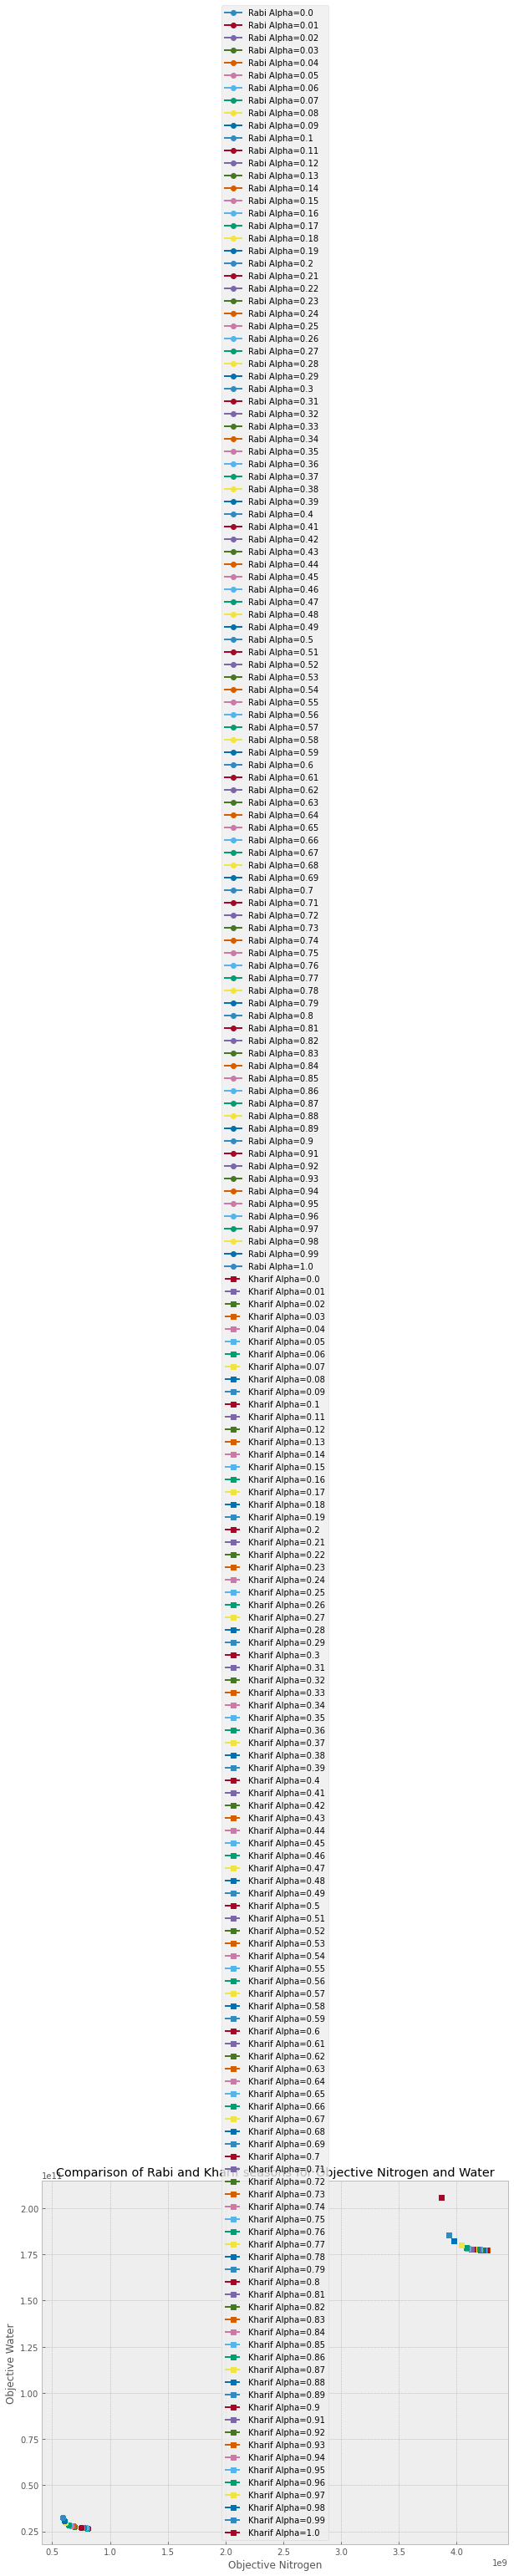

In [78]:
import matplotlib.pyplot as plt

# Assuming rabi_p and kharif_p DataFrames are loaded and contain the necessary columns
# and 'alpha_values' contains the unique values of Alpha you're interested in plotting

alpha_values = sorted(rabi_p['Alpha'].unique())  # Sorted for consistent line plotting

plt.figure(figsize=(10, 8))  # Adjust figure size if needed

# Plot Rabi points and lines
for alpha in alpha_values:
    filtered_results_rabi = rabi_p[rabi_p['Alpha'] == alpha]
    plt.plot(filtered_results_rabi['Objective Nitrogen'], filtered_results_rabi['Objective Water'],
             label=f'Rabi Alpha={alpha}', marker='o', linestyle='-', zorder=1)

# Plot Kharif points and lines
for alpha in alpha_values:
    filtered_results_kharif = kharif_p[kharif_p['Alpha'] == alpha]
    plt.plot(filtered_results_kharif['Objective Nitrogen'], filtered_results_kharif['Objective Water'],
             label=f'Kharif Alpha={alpha}', marker='s', linestyle='--', zorder=1)

plt.xlabel('Objective Nitrogen')
plt.ylabel('Objective Water')
plt.title('Comparison of Rabi and Kharif seasons for Objective Nitrogen and Water')
plt.legend()
plt.grid(True)
plt.show()
